In [4]:
import pandas as pd
import numpy as np



In [5]:
#read emissions csv

emissions= pd.read_csv("emission.csv")
emissions.set_index("Country Code")

#read population csv
population= pd.read_csv("populaiton country by year.csv")
population.set_index("Country Code")

#print(population.head())
population.set_index("Country Code")

#realign emissions

emissions2= emissions.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], 
        var_name="Year", 
        value_name="Value_of_Emissions")
print("emissions dataset \n" )
print(emissions2.head())

#calculate average emissions
average= emissions2["Value_of_Emissions"].mean()
print("\n average: ")
print(average)

#read temperature csv
temps= pd.read_csv("temperature.csv")
print("temp dataset \n" )
print(temps.head())



#realign population

population2= population.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], 
        var_name="Year", 
        value_name="Population")

print(population2.head())

#merge populaiton to emissions
new_df = emissions2.merge(population2, left_on=['Country Name','Year'], right_on = ['Country Name','Year'], how='left')

print("emissions and population \n")
print(new_df.head())
new_df["Total_emissions"] = new_df["Value_of_Emissions"] * new_df["Population"]
print("added new column \n")
print(new_df.head())

#make new df grouped by month and averaging temp change

print("temps new \n")
new_temps= temps.groupby(["Year", "Area"]).mean()

print("\n new temps \n")
print(new_temps)


emissions dataset 

                  Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                           Indicator Name  Indicator Code  Year  \
0  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  1960   
1  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  1960   
2  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  1960   
3  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  1960   
4  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  1960   

   Value_of_Emissions  
0                 NaN  
1            0.906060  
2            0.046057  
3            0.090880  
4            0.100835  

 average: 
4.10493173511307
temp dataset 

  Domain Code              Domain  Area Code (FAO)         Area  Element Code  \
0          ET  Temperatur

In [6]:
#drop months from temps
nomonths_temps = temps
nomonths_temps = nomonths_temps.drop(['Months'], axis=1)
nomonths_temps = nomonths_temps.drop(['Months Code'], axis=1)

print(nomonths_temps.columns)


nomonths_temps2= nomonths_temps.groupby(["Year", "Area"]).mean()
nomonths_temps2.head()




Index(['Domain Code', 'Domain', 'Area Code (FAO)', 'Area', 'Element Code',
       'Element', 'Year Code', 'Year', 'Unit', 'Value', 'Flag',
       'Flag Description'],
      dtype='object')


Area Code (FAO)  Element Code  Year Code     Value
Year Area                                                              
1961 Afghanistan                 2.0        7271.0     1961.0 -0.017471
     Albania                     3.0        7271.0     1961.0  0.481588
     Algeria                     4.0        7271.0     1961.0  0.228412
     American Samoa              5.0        7271.0     1961.0  0.024588
     Andorra                     6.0        7271.0     1961.0  0.947941

In [7]:
nomonths_temps["Year Code"].astype(int)
nomonths_temps.head()




,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,2,Afghanistan,7271,Temperature change,1961,1961,?C,0.746,Fc,Calculated data
1,ET,Temperature change,2,Afghanistan,7271,Temperature change,1962,1962,?C,0.009,Fc,Calculated data
2,ET,Temperature change,2,Afghanistan,7271,Temperature change,1963,1963,?C,2.695,Fc,Calculated data
3,ET,Temperature change,2,Afghanistan,7271,Temperature change,1964,1964,?C,-5.277,Fc,Calculated data
4,ET,Temperature change,2,Afghanistan,7271,Temperature change,1965,1965,?C,1.827,Fc,Calculated data


In [8]:
#finalize temps without months, grouping by area and year

temp_final= nomonths_temps[["Area", "Year","Value"]]
print(temp_final.head())



          Area  Year  Value
0  Afghanistan  1961  0.746
1  Afghanistan  1962  0.009
2  Afghanistan  1963  2.695
3  Afghanistan  1964 -5.277
4  Afghanistan  1965  1.827


In [9]:
#finally get the temps dataset in order


yearly_avg2=temp_final[["Area", "Year", "Value"]].groupby(["Area", "Year"],as_index=False).Value.mean()
yearly_avg2.head()

,Area,Year,Value
0,Afghanistan,1961,-0.017471
1,Afghanistan,1962,-0.248824
2,Afghanistan,1963,0.848176
3,Afghanistan,1964,-0.958882
4,Afghanistan,1965,-0.102294


In [12]:

new_df.head(20)

#change data types to match

new_df["Year"]= pd.to_numeric(new_df["Year"], errors='coerce')

new_df.head()


#merge temp with the emissions+popualiton datset


final= new_df.merge(yearly_avg2, left_on=['Country Name','Year'], right_on = ['Area','Year'], how='left')
final.head(270)

#drop unnecesay colums


final.head()
final2 = final.drop(["Indicator Name_x", "Indicator Code_x", "Country Code_y", "Indicator Code_y", "Indicator Name_y"], axis=1)
final2.head()

#We finally have a good looking dataset!!! A lot of values are missing for 1960, but that's ok! 
#Note: value = temeprature chane awawy from a value considered normal. 
#Not suere who decided what nromal is or how they decided it. I should look into that


#print(final2.head())
final6= final2.set_index("Country Code_x")

#removing dta about contentnts and income groups so each entry is just a country
#print (final3)
final7 = final6.drop(["OSS", "AFE", "PRE", "AFW","ARB", "CEB", "CSS", "EAP", "EAR", "EAS", "ECA", "ECS","EMU", "EUU", "FCS", "HIC", "HPC", "IBD", "IBT", "IDA", "IDB","IDX","INX", "LAC", "LCN", "LDC", "LIC", "LMC", "LMY", "LTE", "MEA", "MIC", "MNA", "NAC", "OED", "OSS", "PRE", "PSS", "PST", "SSA", "SSF", "SST", "TEA", "TEC", "TLA", "TMN", "TSA", "TSS", "UMC", "WLD" ])
print(final7.head())


               Country Name    Year  Value_of_Emissions  Population  \
Country Code_x                                                        
ABW                   Aruba  1960.0                 NaN     54208.0   
AFG             Afghanistan  1960.0            0.046057   8996967.0   
AGO                  Angola  1960.0            0.100835   5454938.0   
ALB                 Albania  1960.0            1.258195   1608800.0   
AND                 Andorra  1960.0                 NaN     13410.0   

                Total_emissions Area  Value  
Country Code_x                               
ABW                         NaN  NaN    NaN  
AFG                    414371.0  NaN    NaN  
AGO                    550050.0  NaN    NaN  
ALB                   2024184.0  NaN    NaN  
AND                         NaN  NaN    NaN  


<AxesSubplot:title={'center':'global temperature change'}, xlabel='Year'>

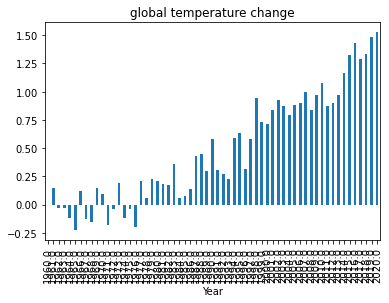

In [13]:
#graph gloabl temperature change
import matplotlib as plt
global_change= final7[["Country Name", "Year", "Value"]].groupby(by="Year").Value.mean()
global_change.plot(kind= "bar", title= "global temperature change")


Enter a country: Syrian Arab Republic
Syrian Arab Republic
the average change in temperatrueaway from the norm in Syrian Arab Republic since 1961 is: 
0.424


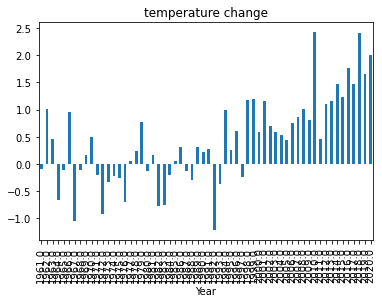

In [67]:
#Graph temperature change for any chosen country

#accept input

val= input("Enter a country: ")
print(val)

#graph
df_country= final[["Area", "Year", "Value"]].loc[(final["Area"] ==val)].groupby(by="Year").Value.mean()

df_country.plot(kind="bar", title = "temperature change")


#claculate average
average_country_temp_change= final[["Area", "Year", "Value"]].loc[(final["Area"] ==val)].Value.mean()

rounded_average_country_temp_change = round(average_country_temp_change,3)
print("the average change in temperatrueaway from the norm in " + str(val) + " since 1961 is: ")
print(rounded_average_country_temp_change)

<AxesSubplot:title={'center':'global emissions per capita in tons of co2'}, xlabel='Year'>

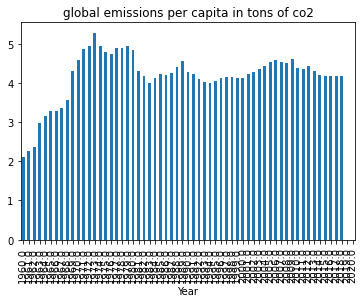

In [14]:
#global emissions per capita

global_emissions= final7[["Country Name", "Year", "Value_of_Emissions"]].groupby(by="Year").Value_of_Emissions.mean()
global_emissions.plot(kind= "bar", title= "global emissions per capita in tons of co2")

Enter a country: France
France
the average emissions per capita in France since 1961 is: 
6.7439772456


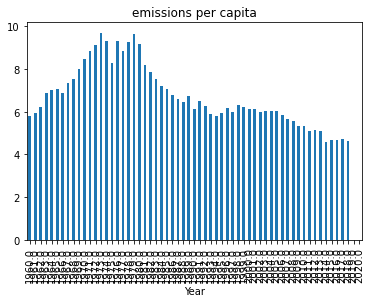

In [16]:



#Emissions per capita


valz= input("Enter a country: ")
print(valz)


df_country3= final7[["Country Name", "Year", "Value_of_Emissions"]].loc[(final7["Country Name"] ==valz)].groupby(by="Year").Value_of_Emissions.mean()

df_country3.plot(kind="bar", title = "emissions per capita")


#claculate average
average_country_emissions_per_capita= final7[["Area", "Year", "Value_of_Emissions"]].loc[(final7["Area"] ==valz)].Value_of_Emissions.mean()

rounded_average_country_emissions_per_capita = round(average_country_emissions_per_capita,10)
print("the average emissions per capita in " + str(valz) + " since 1961 is: ")
print(rounded_average_country_emissions_per_capita)





world?


<AxesSubplot:title={'center':'populaiton or world'}, xlabel='Year'>

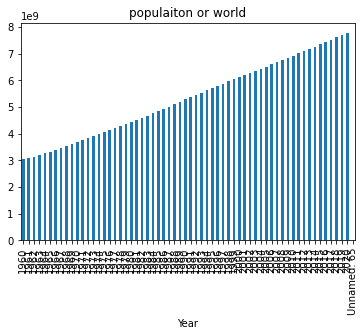

In [132]:
#graph population of earth


average_world_pop= population2[["Country Name", "Year", "Population"]].loc[(population2["Country Name"] =="World")].groupby(by="Year").Population.sum()
average_world_pop.plot(kind="bar", title = "populaiton or world")



Enter a country: Germany
Germany
the average population over the last 60 years in Germany is: 
4783480291


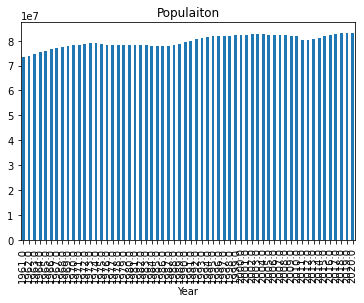

In [96]:
#population of any country

#accept user input
val2= input("Enter a country: ")
print(val2)


df_country3= final2[["Area", "Year", "Population"]].loc[(final["Area"] ==val2)].groupby(by="Year").Population.mean()

df_country3.plot(kind="bar", title = "Populaiton")


#claculate average
average_country_pop= final2[["Area", "Year", "Population"]].loc[(final2["Area"] ==val2)].Population.sum()

rounded_average_country_pop = round(average_country_pop)
print("the average population over the last 60 years in " + str(val2) + " is: ")
print(rounded_average_country_pop)

                      Country Name Country Code_x    Year  Value_of_Emissions  \
1      Africa Eastern and Southern            AFE  1960.0            0.906060   
3       Africa Western and Central            AFW  1960.0            0.090880   
7                       Arab World            ARB  1960.0            0.609268   
36  Central Europe and the Baltics            CEB  1960.0            5.228903   
49          Caribbean small states            CSS  1960.0            1.401336   

     Population  Total_emissions Area  Value  
1   130836765.0     1.185459e+08  NaN    NaN  
3    96396419.0     8.760463e+06  NaN    NaN  
7    92197715.0     5.617315e+07  NaN    NaN  
36   91401764.0     4.779310e+08  NaN    NaN  
49    4194711.0     5.878201e+06  NaN    NaN  


<AxesSubplot:title={'center':'global emissions per capita in tons of C02'}, xlabel='Year'>

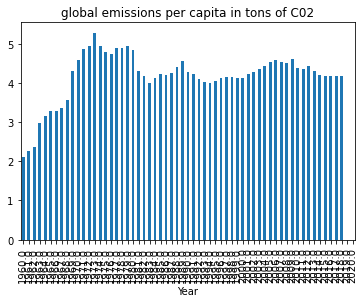

In [37]:
#global emissions
#final2.head()

#make a dataest of only areas
areas= final2[final2["Country Code_x"].isin(["OSS", "AFE", "PRE", "AFW","ARB", "CEB", "CSS", "EAP", "EAR", "EAS", "ECA", "ECS","EMU", "EUU", "FCS", "HIC", "HPC", "IBD", "IBT", "IDA", "IDB","IDX","INX", "LAC", "LCN", "LDC", "LIC", "LMC", "LMY", "LTE", "MEA", "MIC", "MNA", "NAC", "OED", "OSS", "PRE", "PSS", "PST", "SSA", "SSF", "SST", "TEA", "TEC", "TLA", "TMN", "TSA", "TSS", "UMC", "WLD"] )]                  
print(areas.head())

    
    # List of aareas
    #"OSS","AFE", "PRE", "AFW","ARB", "CEB", "CSS", "EAP", "EAR", "EAS", "ECA", "ECS","EMU", "EUU", "FCS", "HIC", "HPC", "IBD", "IBT", "IDA", "IDB","IDX","INX", "LAC", "LCN", "LDC", "LIC", "LMC", "LMY", "LTE", "MEA", "MIC", "MNA", "NAC", "OED", "OSS", "PRE", "PSS", "PST", "SSA", "SSF", "SST", "TEA", "TEC", "TLA", "TMN", "TSA", "TSS", "UMC", "WLD" )]


#print(final2.head())
final3= final2.set_index("Country Code_x")

#removing dta about contentnts and income groups so each entry is just a country


final4 = final3.drop(["OSS", "AFE", "PRE", "AFW","ARB", "CEB", "CSS", "EAP", "EAR", "EAS", "ECA", "ECS","EMU", "EUU", "FCS", "HIC", "HPC", "IBD", "IBT", "IDA", "IDB","IDX","INX", "LAC", "LCN", "LDC", "LIC", "LMC", "LMY", "LTE", "MEA", "MIC", "MNA", "NAC", "OED", "OSS", "PRE", "PSS", "PST", "SSA", "SSF", "SST", "TEA", "TEC", "TLA", "TMN", "TSA", "TSS", "UMC", "WLD" ])
#print(final4.head())


global_emis= final4[["Area", "Year", "Value_of_Emissions"]].groupby(by="Year").Value_of_Emissions.mean()
global_emis.plot(kind= "bar", title= "global emissions per capita in tons of C02")


Enter a country: France
France
the average emissions over the last 60 years in France is: 
10.009
tons of C02


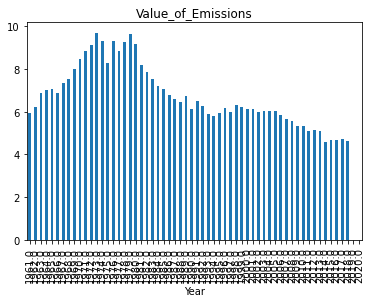

In [18]:
#graph total emissions of any country

val5= input("Enter a country: ")
print(val5)


df_country4= final2[["Area", "Year", "Value_of_Emissions"]].loc[(final["Area"] ==val5)].groupby(by="Year").Value_of_Emissions.mean()

df_country4.plot(kind="bar", title = "Value_of_Emissions")


#claculate average
average_country_emiss= final2[["Area", "Year", "Value_of_Emissions"]].loc[(final2["Area"] ==val2)].Value_of_Emissions.mean()

rounded_average_country_emiss = round(average_country_emiss, 3)
print("the average emissions over the last 60 years in " + str(val5) + " is: ")
print(rounded_average_country_emiss)
print("tons of C02")

usa emission


<AxesSubplot:title={'center':'US per capita emissions over the years'}, xlabel='Year'>

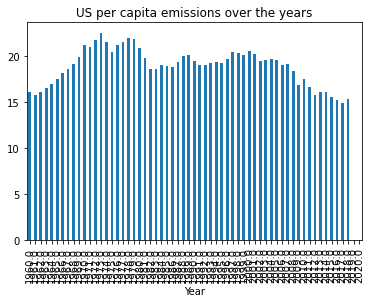

In [19]:
#graph emissions just of usa

print("usa emission")
df_usa= final2[["Country Name", "Year", "Value_of_Emissions"]].loc[(final2["Country Name"] =="United States")].groupby(by="Year").Value_of_Emissions.mean()

df_usa.plot(kind= "bar", title = "US per capita emissions over the years")



 per capita usa emission


<AxesSubplot:title={'center':'US  total emissions per year'}, xlabel='Year'>

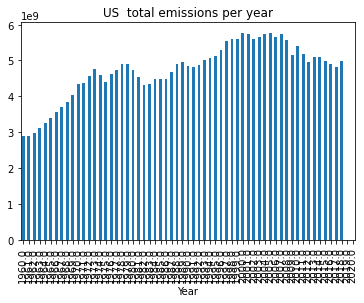

In [21]:
#Graph us per capita emissions

print(" per capita usa emission")
df_usa= final2[["Country Name", "Year", "Total_emissions"]].loc[(final2["Country Name"] =="United States")].groupby(by="Year").Total_emissions.mean()

df_usa.plot(kind= "bar", title = "US  total emissions per year")


Empty DataFrame
Columns: [Country Name, Year, Population]
Index: []
Empty DataFrame
Columns: [Country Name, Year, Population]
Index: []


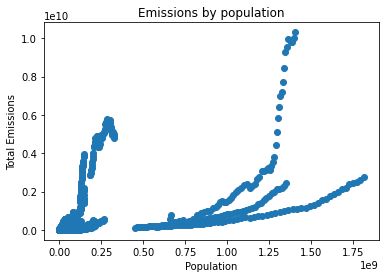

In [149]:


import matplotlib.pyplot as plt
plt.scatter(final4["Population"], final4["Total_emissions"])
plt.xlabel("Population")
plt.ylabel("Total Emissions")
plt.title("Emissions by population")
plt.show()

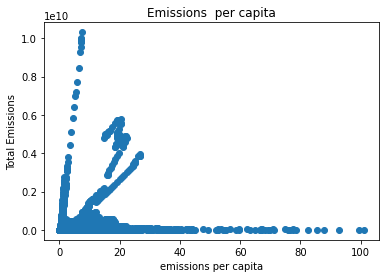

In [150]:
#wait- this doesn't make sense. You'd expect emissions per capita to rise with total emissions

plt.scatter(final4["Value_of_Emissions"], final4["Total_emissions"])
plt.xlabel("emissions per capita")
plt.ylabel("Total Emissions")
plt.title("Emissions  per capita")
plt.show()

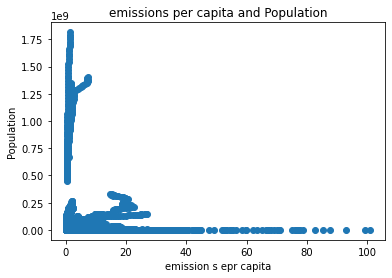

In [151]:
#this shows lower populations having more emissions oer capita
plt.scatter(final4["Value_of_Emissions"], final4["Population"])
plt.xlabel("emission s epr capita")
plt.ylabel("Population")
plt.title("emissions per capita and Population")
plt.show()

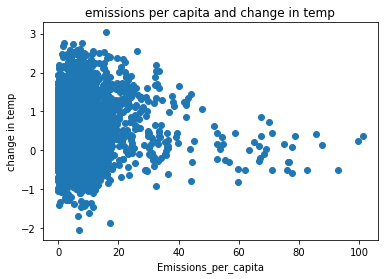

In [152]:
#graphiong emissions oepr capita and change in temp
plt.scatter(final4["Value_of_Emissions"], final4["Value"])
plt.xlabel("Emissions_per_capita")
plt.ylabel("change in temp")
plt.title("emissions per capita and change in temp")
plt.show()

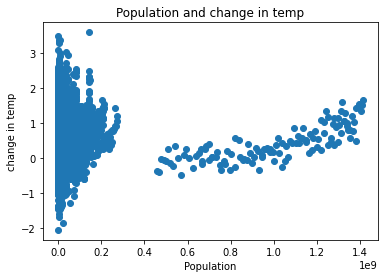

In [153]:
#graphing poulaiton vs change in temp
plt.scatter(final4["Population"], final4["Value"])
plt.xlabel("Population")
plt.ylabel("change in temp")
plt.title("Population and change in temp")
plt.show()

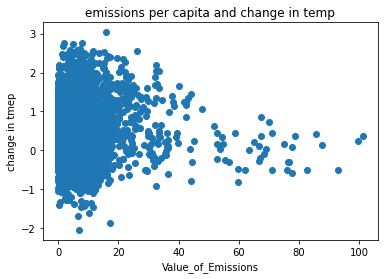

In [154]:
plt.scatter(final4["Value_of_Emissions"], final4["Value"])
plt.xlabel("Value_of_Emissions")
plt.ylabel("change in tmep")
plt.title("emissions per capita and change in temp")
plt.show()

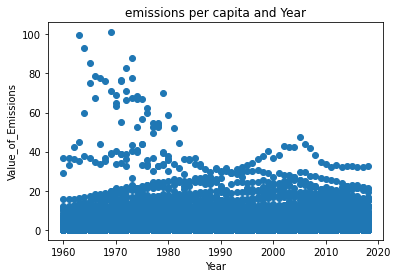

In [155]:
plt.scatter(final4["Year"], final4["Value_of_Emissions"])
plt.xlabel("Year")
plt.ylabel("Value_of_Emissions")
plt.title("emissions per capita and Year")
plt.show()

In [131]:

#drop na values

final5= final4.dropna()

final3= final2.dropna()

#set x as dependent variables and y as independent variable

x = final5[[ 'Population', 'Value_of_Emissions']]
y = final5['Value']

#import regression modeling ability
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x, y)

#put in sample predictive values
predicted_temp_change = regr.predict([[8000000000, 4.5]])
print("If the population is 8000000000, and the per capita C02 output is 4.5, then the expected change in temperature is: ")
print(predicted_temp_change)


print("The average per capita Co2 output is currently 4.7 tos of Co2. The world populaiton is 8 billion")

print("In the US, the per-capita C02 is 15 tons. If the whole world used C02 like the us, the temp change would be: ")
golbal_preidcted_temp_us= regr.predict([[8400000000, 15]])
print(golbal_preidcted_temp_us)

#allow user input

a= input("Choose a populaiton size")
b= input("choose a per capita  amount of tons of Co2 ")


print("If the population is " + str(a) +", and the pe capita C02 output is " + str(b) +", then the expected change in temperature is: ")
user_preidcted_temp= regr.predict([[a, b]])
print(user_preidcted_temp)


If the population is 8000000000, and the per capita C02 output is 4.5, then the expected change in temperature is: 
[1.60717527]
The average per capita Co2 output is currently 4.7 tos of Co2. The world populaiton is 8 billion
In the US, the per-capita C02 is 15 tons. If the whole world used C02 like the us, the temp change would be: 
[1.72996562]
Choose a populaiton size800000000
choose a per capita  amount of tons of Co2 40
If the population is 800000000, and the pe capita C02 output is 40, then the expected change in temperature is: 
[0.82895224]


/Users/annashomsky/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [132]:
#drop na values
print("currently, the earth's populaiton is 8 billion, and 34 billions tons of Co2 are prudcued each year. \n")

final3= final2.dropna()

#set x as dependent variables and y as independent variable

i = final5[[ 'Population', 'Total_emissions']]
d = final5['Value']

#import regression modeling ability
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(i, d)

#put in sample predictive values
predicted_temp_change2 = regr.predict([[8000000000, 40000000000]])
print("If the population is 8,000,000,000, and the total C02 output is 40,000,000,000, then the expected change in temperature is: ")
print(predicted_temp_change2)

print("\n")



#allow user input

c= input("Choose a populaiton size")
d= input("choose an amount of tons of Co2 ")


print("If the population is " + str(c) +", and the C02 output is " + str(d) +", then the expected change in temperature is: ")
user_preidcted_temp2= regr.predict([[c, d]])
print(user_preidcted_temp2)




currently, the earth's populaiton is 8 billion, and 34 billions tons of Co2 are prudcued each year. 

If the population is 8,000,000,000, and the total C02 output is 40,000,000,000, then the expected change in temperature is: 
[5.8013349]


Choose a populaiton size12000000000
choose an amount of tons of Co2 50000000000
If the population is 12000000000, and the C02 output is 50000000000, then the expected change in temperature is: 
[6.24331629]


/Users/annashomsky/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [133]:
#set x as dependent variables and y as independent variable

i = final5[[ 'Population', 'Total_emissions', "Year"]]
d = final5['Value']

#import regression modeling ability
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(i, d)

#put in sample predictive values
predicted_temp_change3 = regr.predict([[8000000000, 40000000000, 2025]])
print("In 2025, If the population is 8 billion, and the total C02 output is 40 billion, then the expected change in temperature is: ")
print(predicted_temp_change3)


print("\n currently, the earth's populaiton is 8 billion, and 34 billions tons of Co2 are prudcued each year. \n")

#allow user input

c= input("Choose a populaiton size")
d= input("choose an amount of tons of Co2 ")
e= input("year")

print("In the year " + str(e) + " If the population is " + str(c) +", and the C02 output is " + str(d) +", then the expected change in temperature is: ")
user_preidcted_temp3= regr.predict([[c, d, e]])
print(user_preidcted_temp3)




In 2025, If the population is 8 billion, and the total C02 output is 40 billion, then the expected change in temperature is: 
[2.61764149]

 currently, the earth's populaiton is 8 billion, and 34 billions tons of Co2 are prudcued each year. 

Choose a populaiton size12000000000
choose an amount of tons of Co2 3000000000
year2200
In the year 2200 If the population is 12000000000, and the C02 output is 3000000000, then the expected change in temperature is: 
[2.3871228]


/Users/annashomsky/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [167]:
#checking to see if an outer vs a left merge would change things

outer_df= emissions2.merge(population2, left_on=['Country Name','Year'], right_on = ['Country Name','Year'], how='outer')

print("\n outer")
print(outer_df)
print("\n final")
print(final2)
print("\n before second merge \n")
print(new_df)

print(final5)


 outer
                      Country Name Country Code_x  \
0                            Aruba            ABW   
1      Africa Eastern and Southern            AFE   
2                      Afghanistan            AFG   
3       Africa Western and Central            AFW   
4                           Angola            AGO   
...                            ...            ...   
16487                       Kosovo            XKX   
16488                  Yemen, Rep.            YEM   
16489                 South Africa            ZAF   
16490                       Zambia            ZMB   
16491                     Zimbabwe            ZWE   

                             Indicator Name_x Indicator Code_x         Year  \
0      CO2 emissions (metric tons per capita)   EN.ATM.CO2E.PC         1960   
1      CO2 emissions (metric tons per capita)   EN.ATM.CO2E.PC         1960   
2      CO2 emissions (metric tons per capita)   EN.ATM.CO2E.PC         1960   
3      CO2 emissions (metric tons per c

In [60]:
#found Syria and Paelstine


df_syria2= outer_df[["Country Name", "Year", "Population"]].loc[(outer_df["Country Name"] =="Syrian Arab Republic")]
print(df_syria2.head())

df_palestine2= outer_df[["Country Name", "Year", "Population"]].loc[(outer_df["Country Name"] =="West Bank and Gaza")]
print(df_palestine2.head())


#rich vs poor
df_indebted= outer_df[["Country Name", "Year", "Population"]].loc[(outer_df["Country Name"] =="Heavily indebted poor countries (HIPC)")]
print(df_indebted.head())

df_rich= outer_df[["Country Name", "Year", "Population"]].loc[(outer_df["Country Name"] =="High income")]
print(df_rich.head())

print("world")
#world
df_world= outer_df[["Country Name", "Year", "Population"]].loc[(outer_df["Country Name"] =="World")]
print(df_world.head(300))

#Latin America & Caribbean (excluding high income)
#Latin America & Caribbean
#dataset is missiing Syria and palestine
#Least developed countries: UN classification
#Low income
#Lower middle income
#Low & middle income
#Late-demographic dividend
#Middle East & North Africa
#Middle income
#Middle East & North Africa (excluding high income)
#North America
#OECD members
#Other small states
#Pre-demographic dividend
#West Bank and Gaza
#Pacific island small states
#Post-demographic dividend
#Russian Federation
#Sub-Saharan Africa (excluding high income)
#Sub-Saharan Africa
#Small states
#Syrian Arab Republic
#East Asia & Pacific
#Europe & Central Asia
#Latin America & the Caribbean
#Middle East & North Africa
#South Asia (IDA & IBRD)
#Sub-Saharan Africa (IDA & IBRD countries)
#Upper middle income
#World


#let's count how many countries

counts = final2["Country Name"].nunique()
print(counts)

#according to this, there are 266 countries in the dataframe. This is becasue many territories are represented seperately (eg, Guam and Gibraltar)



              Country Name  Year  Population
227   Syrian Arab Republic  1960   4573514.0
493   Syrian Arab Republic  1961   4721893.0
759   Syrian Arab Republic  1962   4875429.0
1025  Syrian Arab Republic  1963   5034639.0
1291  Syrian Arab Republic  1964   5200341.0
            Country Name  Year  Population
196   West Bank and Gaza  1960         NaN
462   West Bank and Gaza  1961         NaN
728   West Bank and Gaza  1962         NaN
994   West Bank and Gaza  1963         NaN
1260  West Bank and Gaza  1964         NaN
                                Country Name  Year   Population
98    Heavily indebted poor countries (HIPC)  1960  161734348.0
364   Heavily indebted poor countries (HIPC)  1961  165573136.0
630   Heavily indebted poor countries (HIPC)  1962  169567052.0
896   Heavily indebted poor countries (HIPC)  1963  173722891.0
1162  Heavily indebted poor countries (HIPC)  1964  178048131.0
     Country Name  Year   Population
95    High income  1960  759783611.0
361   High inc

                  Year  Population  Value_of_Emissions  Total_emissions  \
Country Code_x                                                            
AFG             1961.0   9169406.0            0.053589         491378.0   
AGO             1961.0   5531451.0            0.082204         454708.0   
ALB             1961.0   1659800.0            1.374186        2280874.0   
ARE             1961.0    100801.0            0.109136          11001.0   
ARG             1961.0  20817270.0            2.458551       51180319.0   

                   Value  
Country Code_x            
AFG            -0.017471  
AGO             0.012294  
ALB             0.481588  
ARE            -0.132706  
ARG             0.149059  


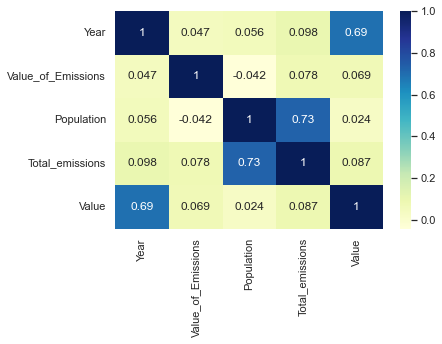

In [64]:
import seaborn as sns
import pandas as pd

#final7.head()
final8= final7.dropna()

#data_only = final7[["Year", "Population", "Value_of_Emissions", "Total_emissions", "Value"]]
#data_only2 = data_only.dropna()
#ax = sns.heatmap(data_only2)




df =pd.DataFrame(data=final8, columns=["Year", "Population","Value_of_Emissions", "Total_emissions", "Value", ])
print(df.head())

df_2= final8.corr(method='pearson')

go=sns.heatmap(df_2, annot=True, cmap="YlGnBu")

ax = go

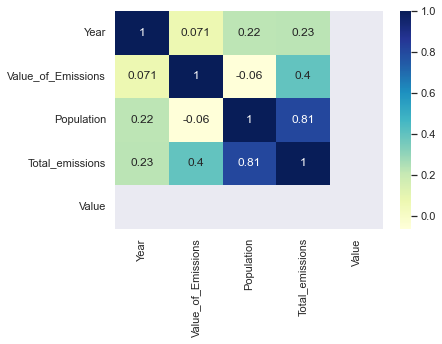

In [65]:
#df =pd.DataFrame(data=areas, columns=["Year", "Population","Value_of_Emissions", "Total_emissions", "Value", ])
#print(df.head())

#here's a heatmap of gloabl areas, rather than countries
df_2= areas.corr(method='pearson')

go=sns.heatmap(df_2, annot=True, cmap="YlGnBu")

ax = go

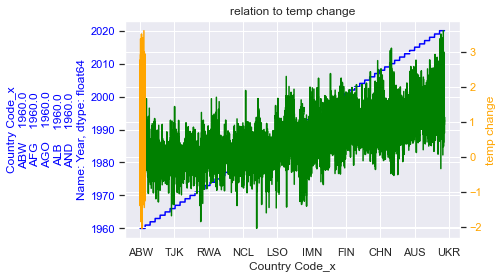

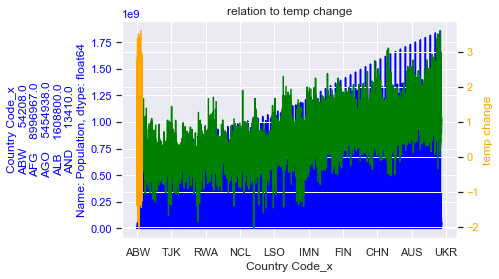

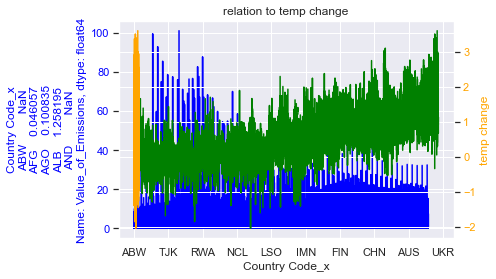

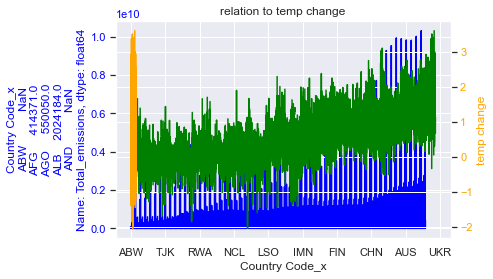

In [73]:
import matplotlib.pyplot as plt






ListOfVariables = [final7["Year"], final7 ["Population"], final7 ["Value_of_Emissions"] ,final7["Total_emissions"]]
    

for item in ListOfVariables:

    
    fig, ax1 = plt.subplots()
 
    ax1.set_ylabel(str(item.head()), color="blue")
    ax1.tick_params(axis='y', labelcolor="blue")
    
   
    item.plot(ax = ax1,color = 'blue')
    ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
    
    
# set axes
   
    ax2 = ax1.twinx()
    series2=final7 ["Value"]
    series2.plot(ax = ax2, color = 'green')
    ax2.plot(final7['Value'], color='orange')
    ax2.xaxis.set_major_locator(plt.MaxNLocator(10))
    
    ax2.tick_params(axis='y', labelcolor="orange")
    ax2.set_ylabel("temp change", color="orange")
    
   
    
    plt.title("relation to temp change")
    plt.show()

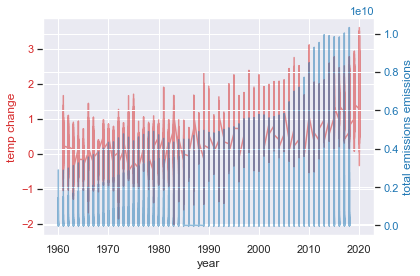

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# map each elemnt to the others
t = final7["Year"]
data1 = final7["Value"]
data2 = final7["Total_emissions"]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('temp change', color=color)
ax1.plot(t, data1, color=color, alpha=0.5)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('total emissions', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color, alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

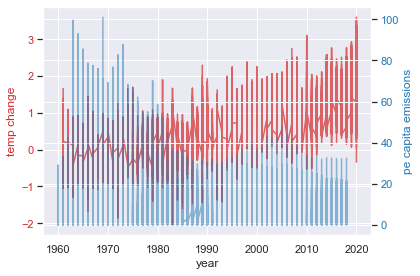

In [120]:

# map each elemnt to the others
t = final7["Year"]
data1 = final7["Value"]
data2 = final7["Value_of_Emissions"]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('temp change', color=color)
ax1.plot(t, data1, color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('pe capita emissions', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color, alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

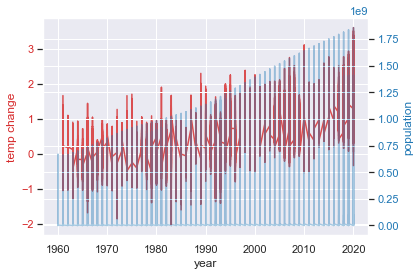

In [119]:



# map each elemnt to the others
t = final7["Year"]
data1 = final7["Value"]
data2 = final7["Population"]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('temp change', color=color)
ax1.plot(t, data1, color=color, alpha=0.8)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('population', color=color)  #
ax2.plot(t, data2, color=color, alpha=0.4)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  
plt.show()

In [126]:
#checking that populaiton is accurate. Looks a bit high, but on the graph it was low? 


x= final7.loc[final7['Year'] == 2020, ['Population']]
y=final7.loc[final7['Year'] == 2020]

print(y["Population"].sum())

print(y)

#s= x["Population"].sum
#print(x)


9591372298.0
                Country Name    Year  Value_of_Emissions  Population  \
Country Code_x                                                         
ABW                    Aruba  2020.0                 NaN    106766.0   
AFG              Afghanistan  2020.0                 NaN  38928341.0   
AGO                   Angola  2020.0                 NaN  32866268.0   
ALB                  Albania  2020.0                 NaN   2837743.0   
AND                  Andorra  2020.0                 NaN     77265.0   
...                      ...     ...                 ...         ...   
XKX                   Kosovo  2020.0                 NaN   1775378.0   
YEM              Yemen, Rep.  2020.0                 NaN  29825968.0   
ZAF             South Africa  2020.0                 NaN  59308690.0   
ZMB                   Zambia  2020.0                 NaN  18383956.0   
ZWE                 Zimbabwe  2020.0                 NaN  14862927.0   

                Total_emissions          Area     

Enter a country: Australia
Australia
the per capita emissions Australia since 1961 is: 
14.847824195

 currently, the earth's populaiton is 8 billion, and 34 billions tons of Co2 are prudcued each year. 

year2300


/Users/annashomsky/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


[7.94546623]
if every coutnry had the same emissions as Australia, in year 2300 and the popualtion was 9000000000 the gloabal climagte change would be [7.94546623]


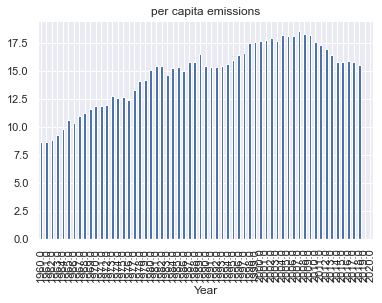

In [162]:

#Emissions per capita


valz= input("Enter a country: ")
print(valz)


df_country3= final7[["Country Name", "Year", "Value_of_Emissions"]].loc[(final7["Country Name"] ==valz)].groupby(by="Year").Value_of_Emissions.mean()

df_country3.plot(kind="bar", title = "per capita emissions")


#claculate average
average_country_emissions_total= final7[["Area", "Year", "Value_of_Emissions"]].loc[(final7["Area"] ==valz)].Value_of_Emissions.mean()

rounded_average_country_emissions_total = round(average_country_emissions_total,10)
print("the per capita emissions " + str(valz) + " since 1961 is: ")
print(rounded_average_country_emissions_total )




#set d as dependent variables and i as independent variable

i = final5[[ "Population",'Value_of_Emissions', "Year"]]
d = final5['Value']

#import regression modeling ability
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(i, d)


print("\n currently, the earth's populaiton is 8 billion, and 34 billions tons of Co2 are prudcued each year. \n")

#allow user input
r=9000000000
e= input("year")

user_preidcted_temp4= regr.predict([[r, rounded_average_country_emissions_total, e]])
print(user_preidcted_temp4)


print("if every coutnry had the same emissions as " + str(valz) + ", in year " + str(e)+ " and the popualtion was " + str (r) +" the gloabal climagte change would be " + str(user_preidcted_temp4))



In [213]:
#get total gloabla emissions and compare to heating. then plug that in to equation

#Start by finding average, min, and max, as well as the countries they belong to 
x= final7.loc[final7['Year'] == 2018, ['Value_of_Emissions']]
y=final7.loc[final7['Year'] == 2018]

#average emission sin most recent year data avaialble

mean_gloabl_emissions_per_capita = y["Value_of_Emissions"].mean()
roundedmean_gloabl_emissions_per_capita= round(mean_gloabl_emissions_per_capita,2)

#Max emissions
max_global=  y["Value_of_Emissions"].max()
print("The average per capita emissiosn worldwide are currently: " + str(roundedmean_gloabl_emissions_per_capita))


max_per_cap_country= final7[["Country Name", "Value_of_Emissions"]].loc[(final7["Value_of_Emissions"]== max_global)].groupby(by = "Country Name").count()
print("The country with the most emissions per capita is " + str(max_per_cap_country))


print("\n The max gloabl emissions per capita is " + str(max_global))

min_global = y["Value_of_Emissions"].min()
rounded_min_global= round(min_global)

print("\n The min gloabl emissions per capita is " + str(rounded_min_global) + "\n")

min_per_cap_country= final7[["Country Name", "Value_of_Emissions"]].loc[(final7["Value_of_Emissions"]== min_global)].groupby(by = "Country Name").count()
print("The country with the least oper captia emissions is "+ str(min_per_cap_country))

total_av= final7.loc[final7['Year'] == 2018, ['Total_emissions']]
y=final7.loc[final7['Year'] == 2018]

mean_gloabl_emissions_total = y["Total_emissions"].mean()
rounded_meangloabl_emissions_total= round(mean_gloabl_emissions_total)

print("The average total emissions are: " + str(rounded_meangloabl_emissions_total)+ "\n" )

max_global_total=  y["Total_emissions"].max()


max_global_country= final7[["Country Name", "Total_emissions"]].loc[(final7["Total_emissions"]== max_global_total)].groupby(by = "Country Name").count()
print(max_global_country)

print( "The max total emissiosn worldwide are currently: " + str(max_global_total) + " in " +str(max_global_country))

min_global_total = y["Total_emissions"].min()


min_global_country = final7[["Country Name", "Total_emissions"]].loc[(final7["Total_emissions"]== min_global_total)].groupby(by = "Country Name").count()
print(min_global_country)

print("\n The min total emissions is " + str(min_global_total) + "in the country "+ str(min_global_country))


The average per capita emissiosn worldwide are currently: 4.18
The country with the most emissions per capita is               Value_of_Emissions
Country Name                    
Qatar                          1

 The max gloabl emissions per capita is 32.4156391708326

 The min gloabl emissions per capita is 0

The country with the least oper captia emissions is                   Value_of_Emissions
Country Name                        
Congo, Dem. Rep.                   1
The average total emissions are: 190304921

              Total_emissions
Country Name                 
China                       1
The max total emissiosn worldwide are currently: 10313459999.999998 in               Total_emissions
Country Name                 
China                       1
              Total_emissions
Country Name                 
Tuvalu                      3

 The min total emissions is 10000.0in the country               Total_emissions
Country Name                 
Tuvalu                     

In [210]:
#calculating where the mins and maxes are

max_per_cap_country= final7[["Country Name", "Value_of_Emissions"]].loc[(final7["Value_of_Emissions"]== max_global)].groupby(by = "Country Name").count()
print(max_per_cap_country)


min_per_cap_country= final7[["Country Name", "Value_of_Emissions"]].loc[(final7["Value_of_Emissions"]== min_global)].groupby(by = "Country Name").count()
print(min_per_cap_country)

max_global_country= final7[["Country Name", "Total_emissions"]].loc[(final7["Total_emissions"]== max_global_total)].groupby(by = "Country Name").count()
print(max_global_country)


min_global_country = final7[["Country Name", "Total_emissions"]].loc[(final7["Total_emissions"]== min_global_total)].groupby(by = "Country Name").count()
print(min_global_country)




              Value_of_Emissions
Country Name                    
Qatar                          1
                  Value_of_Emissions
Country Name                        
Congo, Dem. Rep.                   1
              Total_emissions
Country Name                 
China                       1
              Total_emissions
Country Name                 
Tuvalu                      3


In [216]:
#make a dataset that is total emissions and total temp change


#average_world_pop= population2[["Country Name", "Year", "Population"]].loc[(population2["Country Name"] =="World")].groupby(by="Year").Population.sum()
#average_world_pop.plot(kind="bar", title = "populaiton or world")

world_dataset= final2[["Country Name", "Year", "Population", "Value_of_Emissions", "Total_emissions", "Value"]].loc [(final2["Country Name"]=="World")].groupby(by="Year")
print(world_dataset.head())




      Country Name    Year    Population  Value_of_Emissions  Total_emissions  \
259          World  1960.0  3.032156e+09            3.121158     9.463838e+09   
525          World  1961.0  3.071596e+09            3.068090     9.423934e+09   
791          World  1962.0  3.124561e+09            3.114839     9.732506e+09   
1057         World  1963.0  3.189656e+09            3.221195     1.027450e+10   
1323         World  1964.0  3.255146e+09            3.324046     1.082025e+10   
...            ...     ...           ...                 ...              ...   
15421        World  2017.0  7.519183e+09            4.435536     3.335161e+10   
15687        World  2018.0  7.602454e+09            4.477639     3.404105e+10   
15953        World  2019.0  7.683372e+09                 NaN              NaN   
16219        World  2020.0  7.761620e+09                 NaN              NaN   
16485        World     NaN           NaN                 NaN              NaN   

       Value  
259      NaN

In [283]:
#making a dataset that's just the world

world1= final7.reset_index()
world_dataset= world1[["Year", "Value_of_Emissions","Population", "Total_emissions", "Value"  ]].groupby(by="Year").sum(["Population", "Total_emissions", "Value_of_Emissions","Value"])
world_dataset2= world1[["Year", "Value_of_Emissions","Population", "Total_emissions", "Value"  ]].groupby(by="Year").agg({'Value_of_Emissions':'mean','Population':'sum','Total_emissions':'sum', "Value" : 'mean'})

world_dataset2.head(300)





#world_dataset2.agg({'Value_of_Emissions':'mean','Population':'sum','Total_emissions':'sum', "Value" : 'mean'})
               
#world_dataset2.head()

,Value_of_Emissions,Population,Total_emissions,Value
Year,,,,
1960.0,2.110012,3.594294e+09,8.260204e+09,NaN
1961.0,2.256416,3.645463e+09,8.235764e+09,0.144678
1962.0,2.357039,3.710603e+09,8.514600e+09,-0.027600
1963.0,2.980773,3.788312e+09,8.995333e+09,-0.031211
1964.0,3.145528,3.866847e+09,9.468456e+09,-0.116980
...,...,...,...,...
2016.0,4.170604,9.177872e+09,3.497211e+10,1.427511
2017.0,4.177661,9.285101e+09,3.552092e+10,1.285942
2018.0,4.175293,9.389882e+09,3.634824e+10,1.337775


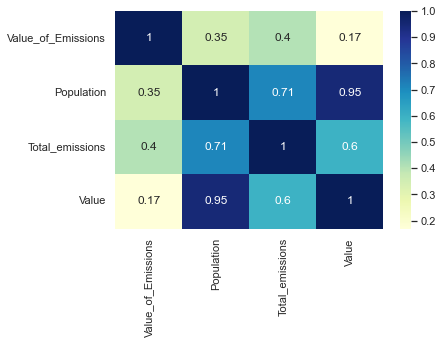

In [284]:
#heatmap of  correlations for world

df_2= world_dataset2.corr(method='pearson')

go=sns.heatmap(df_2, annot=True, cmap="YlGnBu")

ax = go

In [ ]:
#next steps: 

#use this to make a predictive model